In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [31]:
# Load the dataset
data = pd.read_csv(r'C:\Users\marti\Desktop\Project1_DataZoomcamp\Zoomcamp\Project_1\Data_kredit.csv')   # Replace with your dataset path

# Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())

# If missing values are found, display a warning
if data.isnull().sum().any():
    print("\nWarning: The dataset contains missing values!")
else:
    print("\nNo missing values detected.")



Checking for missing values:
CreditRisk        0
ID                0
CreditScore       0
PaymentDelays     0
EmployedMonths    0
DebtRatio         0
CreditAmount      0
Liquidity         0
CreditLines       0
dtype: int64

No missing values detected.


In [32]:
# Step 2: Data Preprocessing
# Encoding 'CreditRisk' column (ja = 1, nein = 0)
if "CreditRisk" in data.columns:
    data["CreditRisk"] = data["CreditRisk"].map({"ja": 1, "nein": 0})

print("\nEn-tête du jeu de données après transformation de 'CreditRisk' :")
print(data.head())


En-tête du jeu de données après transformation de 'CreditRisk' :
   CreditRisk      ID  CreditScore  PaymentDelays  EmployedMonths  DebtRatio  \
0           0  744488          607              5              29      3.414   
1           0  350833          533              8              21      3.737   
2           1  466037          474             12              25      5.061   
3           1  721737          551             13               3      5.926   
4           0  455703          768              0              13      1.910   

   CreditAmount  Liquidity  CreditLines  
0        103519       2696            6  
1         74868       5336            8  
2         93468       1785            4  
3         41708       2104           10  
4        318995      11523            3  


In [33]:
# Check the distribution of the target variable 'CreditRisk'
print("\nDistribution of classes in 'CreditRisk':")
print(data["CreditRisk"].value_counts())


Distribution of classes in 'CreditRisk':
CreditRisk
0    462
1    214
Name: count, dtype: int64


In [34]:
# Optional: Handle class imbalance (if observed)
majority_class = data[data["CreditRisk"] == 0]
minority_class = data[data["CreditRisk"] == 1]
if len(majority_class) > len(minority_class) * 2:  # Example threshold for imbalance
    minority_class = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)
    data = pd.concat([majority_class, minority_class])

In [35]:
# Split features (X) and target (y)
X = data.drop(columns=["CreditRisk", "ID"])  # Remove 'ID' (not useful for prediction)
y = data["CreditRisk"]

In [36]:
# One-hot encoding for categorical features (if any)
X = pd.get_dummies(X, drop_first=True)

In [37]:
# Step 3: Split the dataset into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_test, X_eval, y_test, y_eval = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [38]:
# Step 4: Define the models to train
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Naive Bayes": GaussianNB()
}

In [39]:
# Initialize a dictionary to store the results of each model
results = {}


Training the model: KNN

Classification report for KNN:
              precision    recall  f1-score   support

           0       0.90      0.76      0.82        92
           1       0.79      0.91      0.85        93

    accuracy                           0.84       185
   macro avg       0.85      0.84      0.84       185
weighted avg       0.85      0.84      0.84       185



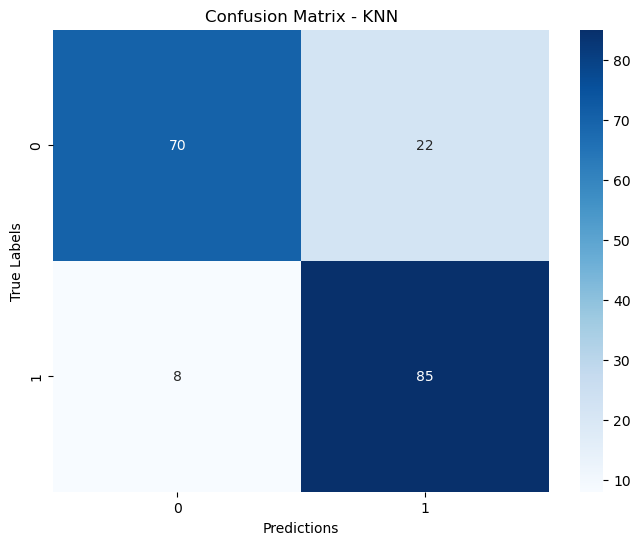


Training the model: Random Forest

Classification report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        92
           1       0.99      1.00      0.99        93

    accuracy                           0.99       185
   macro avg       0.99      0.99      0.99       185
weighted avg       0.99      0.99      0.99       185



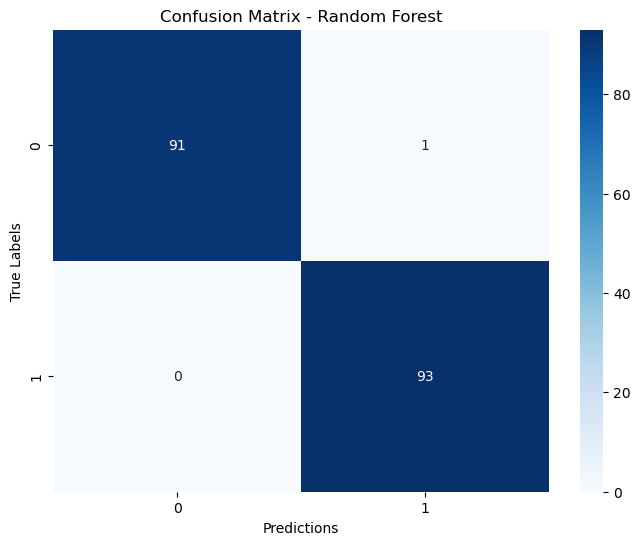


Training the model: Support Vector Machine

Classification report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.87      0.29      0.44        92
           1       0.58      0.96      0.72        93

    accuracy                           0.63       185
   macro avg       0.72      0.63      0.58       185
weighted avg       0.72      0.63      0.58       185



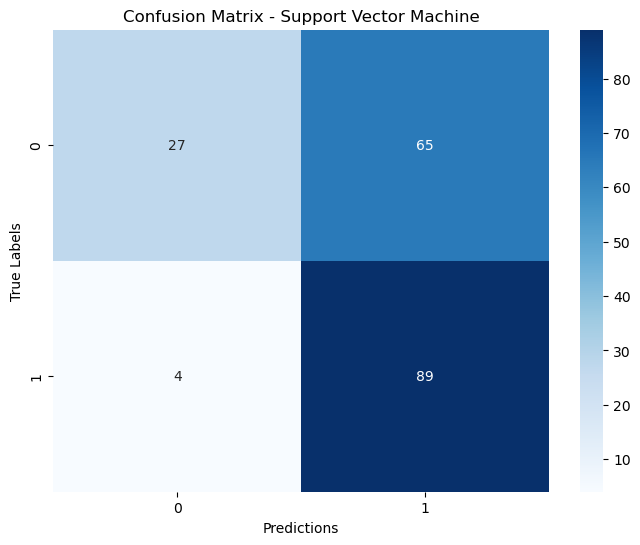


Training the model: Logistic Regression

Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        92
           1       0.93      0.95      0.94        93

    accuracy                           0.94       185
   macro avg       0.94      0.94      0.94       185
weighted avg       0.94      0.94      0.94       185



c:\Users\marti\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


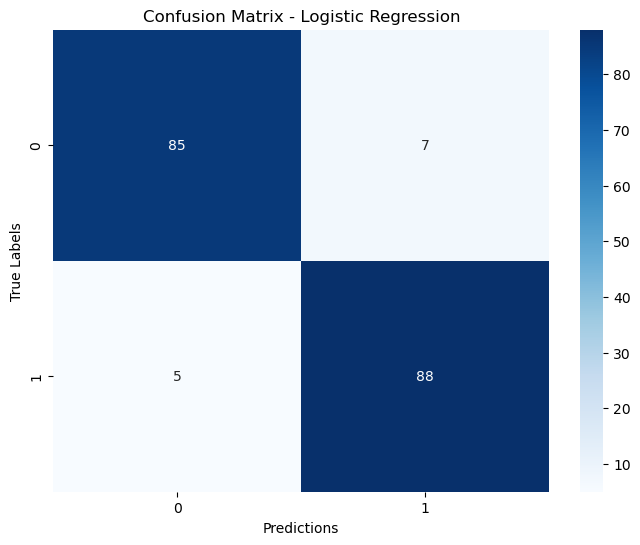


Training the model: Naive Bayes

Classification report for Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        92
           1       0.93      1.00      0.96        93

    accuracy                           0.96       185
   macro avg       0.97      0.96      0.96       185
weighted avg       0.96      0.96      0.96       185



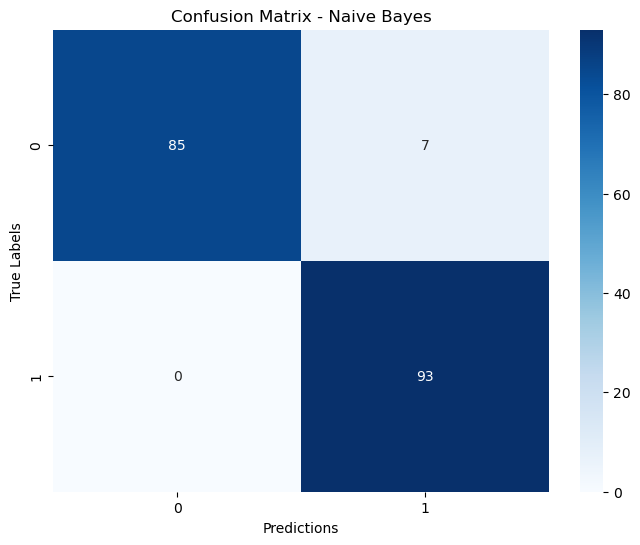

In [40]:
for name, model in models.items():
    print(f"\nTraining the model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="binary")
    recall = recall_score(y_test, y_pred, average="binary")
    f1 = f1_score(y_test, y_pred, average="binary")
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
    
    # Store the results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC AUC": roc_auc
    }
    
    # Print classification report
    print(f"\nClassification report for {name}:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix plot
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predictions")
    plt.ylabel("True Labels")
    plt.show()

In [41]:
# Step 6: Summary of model performances
performance_df = pd.DataFrame(results).T
print("\nSummary of model performances:")
print(performance_df)


Summary of model performances:
                        Accuracy  Precision    Recall  F1-Score   ROC AUC
KNN                     0.837838   0.794393  0.913978  0.850000  0.896973
Random Forest           0.994595   0.989362  1.000000  0.994652  0.999883
Support Vector Machine  0.627027   0.577922  0.956989  0.720648  0.784946
Logistic Regression     0.935135   0.926316  0.946237  0.936170  0.989130
Naive Bayes             0.962162   0.930000  1.000000  0.963731  0.999299


In [42]:
# Identify the best model based on F1-Score
best_model_name = performance_df["F1-Score"].idxmax()
best_model_score = performance_df["F1-Score"].max()
best_model = models[best_model_name]

# Print details about the best model and the reason for its selection
print(f"\nThe best model selected is: {best_model_name}")
print(f"Reason: {best_model_name} achieved the highest F1-Score of {best_model_score:.2f} among all evaluated models.")
print(f"This indicates that {best_model_name} strikes the best balance between precision and recall, "
      "making it the most reliable for classification in this scenario.")


The best model selected is: Random Forest
Reason: Random Forest achieved the highest F1-Score of 0.99 among all evaluated models.
This indicates that Random Forest strikes the best balance between precision and recall, making it the most reliable for classification in this scenario.


In [43]:
# Save only the best model
joblib.dump(best_model, 'best_model.pkl')
print(f"\nThe model {best_model_name} has been saved as 'best_model.pkl'")


The model Random Forest has been saved as 'best_model.pkl'


In [44]:
# Step 8: Final evaluation on the validation set
y_eval_pred = best_model.predict(X_eval)
eval_accuracy = accuracy_score(y_eval, y_eval_pred)
eval_f1 = f1_score(y_eval, y_eval_pred, average="binary")
print(f"\nFinal evaluation on the validation set:")
print(f"Accuracy: {eval_accuracy:.2f}")
print(f"F1-Score: {eval_f1:.2f}")


Final evaluation on the validation set:
Accuracy: 1.00
F1-Score: 1.00
